In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Death_Data.xlsx")

In [3]:
df.head()

,Policy_holder_name,Policy_ID,Insured_ID,Beneficiary_ID,Policy_Amount,Policy_Amount_Premium_Ratio,Policy_Duration_Premium_Interaction,Date_of_Birth,Date_of_Death,Age_at_Death,...,Policy_Updated_in_last_1_year,Premium_Payment_History,Policy_Term,Claim Status,Total Premium Paid,Health Status,Pre-existing Conditions,Settlement Details,Disbursement Method,Beneficial_relationship
0,Arav Patil,179,1001,40,331799.144734,11.656367,2.277204e+05,1984-07-23,2021-10-23,37,...,3,On Time,15,Pending,38087,Good,Diabetes,Annuity,Cheque,Parents
1,Aaradhya Gupta,180,1002,125,185433.605126,4.580855,1.012003e+06,1965-02-09,2022-05-02,57,...,2,On Time,18,Pending,33764,Good,Asthma,Other,Bank Transfer,Parents
2,Aadi Singh,181,1003,166,272971.092293,31.641235,2.243038e+05,1955-02-21,2023-02-26,68,...,2,On Time,9,Rejected,11812,Bad,Other,Annuity,Online Transfer,Parents
3,Aditi Sharma,182,1004,183,75689.085240,12.131309,1.247830e+05,1959-05-04,2021-06-13,62,...,2,On Time,14,Rejected,32512,Bad,Hypertension,Lump sum,Online Transfer,Child
4,Advik Shah,183,1005,289,371007.313648,9.506341,1.170820e+06,1950-10-12,2022-04-26 00:00:00,71,...,2,On Time,27,Pending,40605,Bad,Cancer,Lump sum,Online Transfer,Spouse


In [4]:
df.columns

Index(['Policy_holder_name', 'Policy_ID', 'Insured_ID', 'Beneficiary_ID',
       'Policy_Amount', 'Policy_Amount_Premium_Ratio',
       'Policy_Duration_Premium_Interaction', 'Date_of_Birth', 'Date_of_Death',
       'Age_at_Death', 'Date of Claim', 'Policy_start_date', 'Policy_End date',
       'Policy_Duration_year', 'Short_Policy_Duration_Gretter_Than_5_Years',
       'Cause_of_Death', 'Place_of_Death', 'Hospital_Stay', 'Tobacco_Use',
       'Occupation', 'Claim_amount', 'Income', 'Age_at_Policy issue',
       'Age_at_Policy issue Square', 'Time_since_Policy_Issue',
       'Death_Benefit_to_Income_Ratio', 'Contestable_Period',
       'Policy_Loan_History', 'Surrender_History', 'Premium_Payment_Mode',
       'Travel_History_Last_6_Months', 'High_Risk_Activities',
       'Financial_Strain_Indicators', 'Criminal_History_India',
       'Beneficiary_Financial_Dependence', 'Recent_Communication_Frequency',
       'Claim_Submission_Time_inday', 'Autopsy_Report_Availability',
       'Social_

In [5]:
df.isnull().sum()

Policy_holder_name         0
Policy_ID                  0
Insured_ID                 0
Beneficiary_ID             0
Policy_Amount              0
                          ..
Health Status              0
Pre-existing Conditions    0
Settlement Details         0
Disbursement Method        0
Beneficial_relationship    0
Length: 63, dtype: int64

#### Create Target Column

In [6]:
import pandas as pd
import numpy as np

# df['Date_of_Death'] = pd.to_datetime(df['Date_of_Death'])
# df['Date of Claim'] = pd.to_datetime(df['Date of Claim'])

common_Beneficial_relationship = ['Spouse', 'Child', 'Parents']
common_causes_of_death = ['Heart Attack', 'Car Accident', 'Cancer', 'Stroke', 'Kidney Failure']


def detect_fraud(claim):
    # Policy and claim history
    if claim['Count of claim'] > 1:
        return 1
#     if (claim["Date of Claim"] < (df["Date_of_Death"] + pd.DateOffset(months=1))).any():
#         return 1

    if claim['Policy_updated_in_last_3_months'] > 3 or claim['Policy_Updated_in_last_1_year'] > 5:
        return 1

    if claim['Premium_Payment_History'] == 'Missed':
        return 1

    if claim['Cause_of_Death'] in common_causes_of_death:
        return 0

    if claim['Beneficial_relationship'] in common_Beneficial_relationship:
        return 0

    if claim['Autopsy_Report_Availability'] == 'No':
        return 1

    return 0

# Apply the fraud detection function to the dataset
df['Fraudulent_Claim'] = df.apply(detect_fraud, axis=1)

# Display the distribution of the target variable
print("Distribution of Fraudulent Claims:")
print(df['Fraudulent_Claim'].value_counts())


Distribution of Fraudulent Claims:
Fraudulent_Claim
0    390
1    110
Name: count, dtype: int64


In [7]:
df.columns.tolist()

['Policy_holder_name',
 'Policy_ID',
 'Insured_ID',
 'Beneficiary_ID',
 'Policy_Amount',
 'Policy_Amount_Premium_Ratio',
 'Policy_Duration_Premium_Interaction',
 'Date_of_Birth',
 'Date_of_Death',
 'Age_at_Death',
 'Date of Claim',
 'Policy_start_date',
 'Policy_End date',
 'Policy_Duration_year',
 'Short_Policy_Duration_Gretter_Than_5_Years',
 'Cause_of_Death',
 'Place_of_Death',
 'Hospital_Stay',
 'Tobacco_Use',
 'Occupation',
 'Claim_amount',
 'Income',
 'Age_at_Policy issue',
 'Age_at_Policy issue Square',
 'Time_since_Policy_Issue',
 'Death_Benefit_to_Income_Ratio',
 'Contestable_Period',
 'Policy_Loan_History',
 'Surrender_History',
 'Premium_Payment_Mode',
 'Travel_History_Last_6_Months',
 'High_Risk_Activities',
 'Financial_Strain_Indicators',
 'Criminal_History_India',
 'Beneficiary_Financial_Dependence',
 'Recent_Communication_Frequency',
 'Claim_Submission_Time_inday',
 'Autopsy_Report_Availability',
 'Social_Media_Activity_Pre_Death',
 'IP_Address_Geolocation_India',
 'FIR_

In [8]:
df = df.drop(['Policy_holder_name', 'Policy_ID','Beneficiary_ID','Insured_ID','Date_of_Birth','Date_of_Death','Date of Claim','Policy_start_date','Policy_End date','Agent_ID',"Policy_Amount_Premium_Ratio","Age_at_Policy issue Square"], axis=1) 

#### Check Outliers

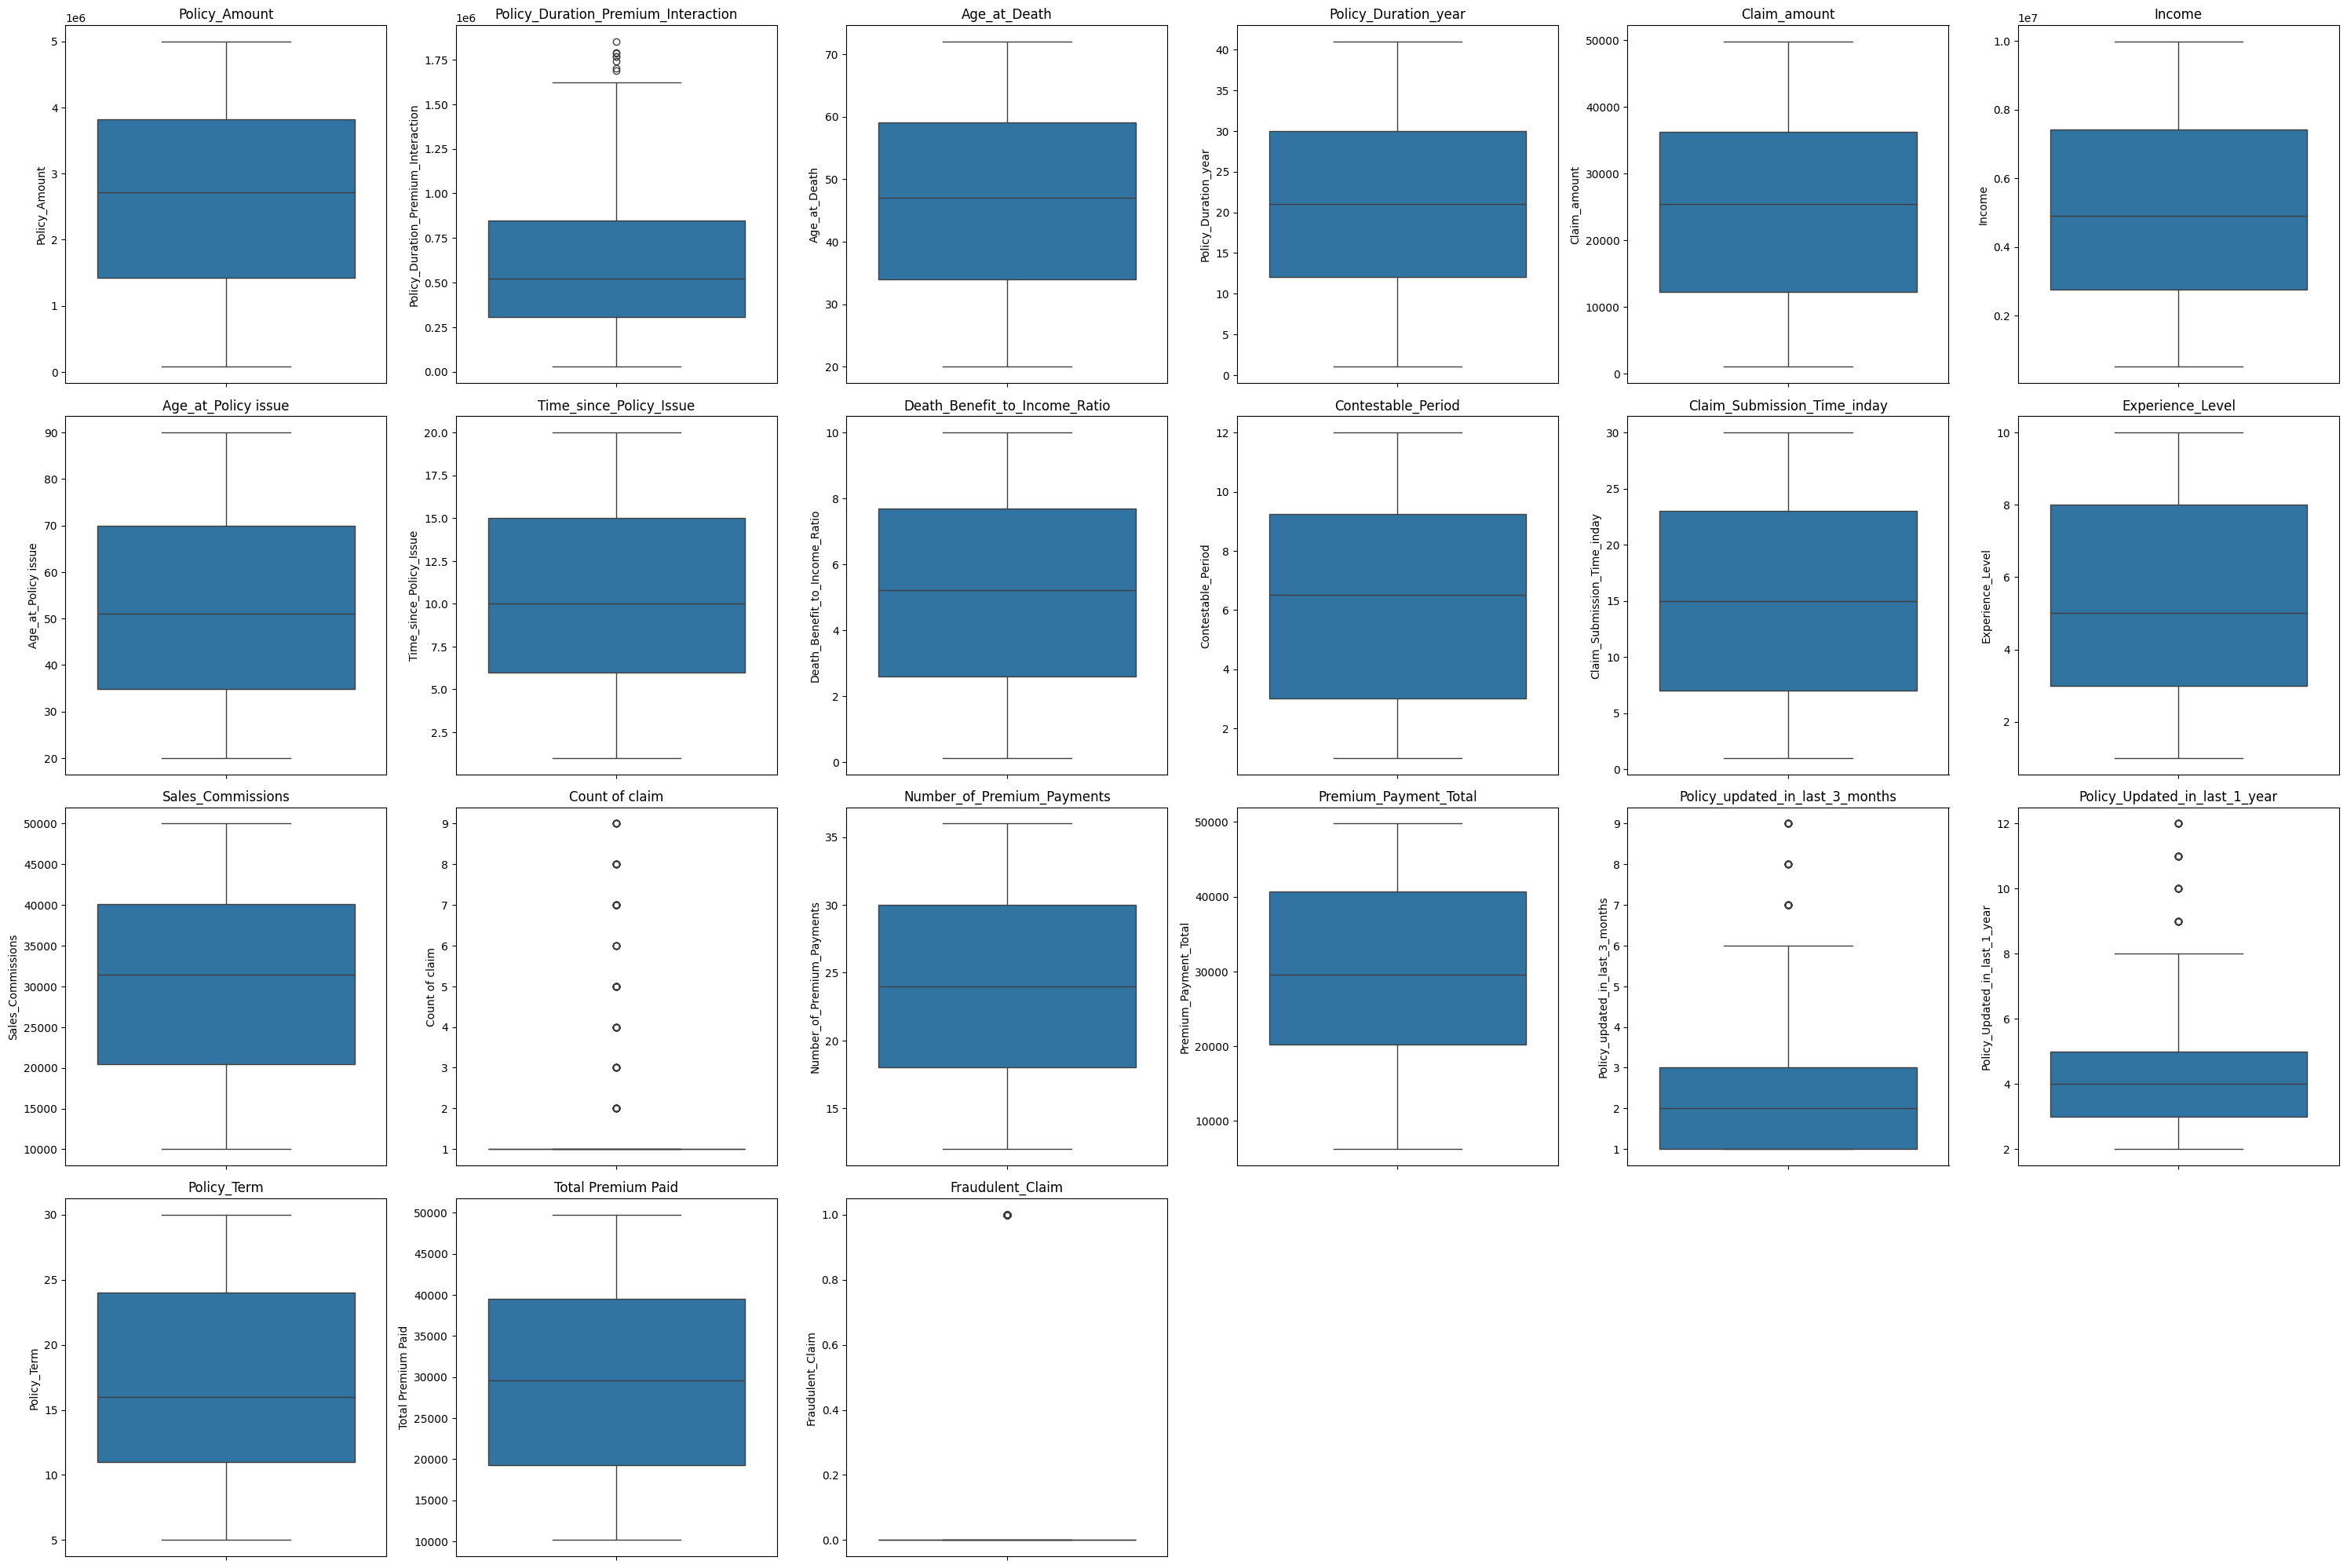

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to find outliers in a column
def find_outliers(column):
    if pd.api.types.is_numeric_dtype(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = (column < lower_bound) | (column > upper_bound)
        return outliers
    else:
        return pd.Series(False, index=column.index)

# Remove duplicate rows
df = df[~df.duplicated()]

# Detect outliers for each column
outliers_per_column = df.apply(find_outliers)

# Create boxplots for numeric columns with outliers
numeric_columns = df.select_dtypes(include=np.number).columns

def plot_boxplots(data, columns):
    plt.figure(figsize=(30, 30))
    for i, col in enumerate(columns, 1):
        plt.subplot(6, 6, i)
        sns.boxplot(data=data[col])
        plt.title(col)
        plt.tight_layout()

# Call the function to plot boxplots for all numeric features
plot_boxplots(df, numeric_columns)
plt.show()


#### Remove Outliers and Applied Null as Mean of Column

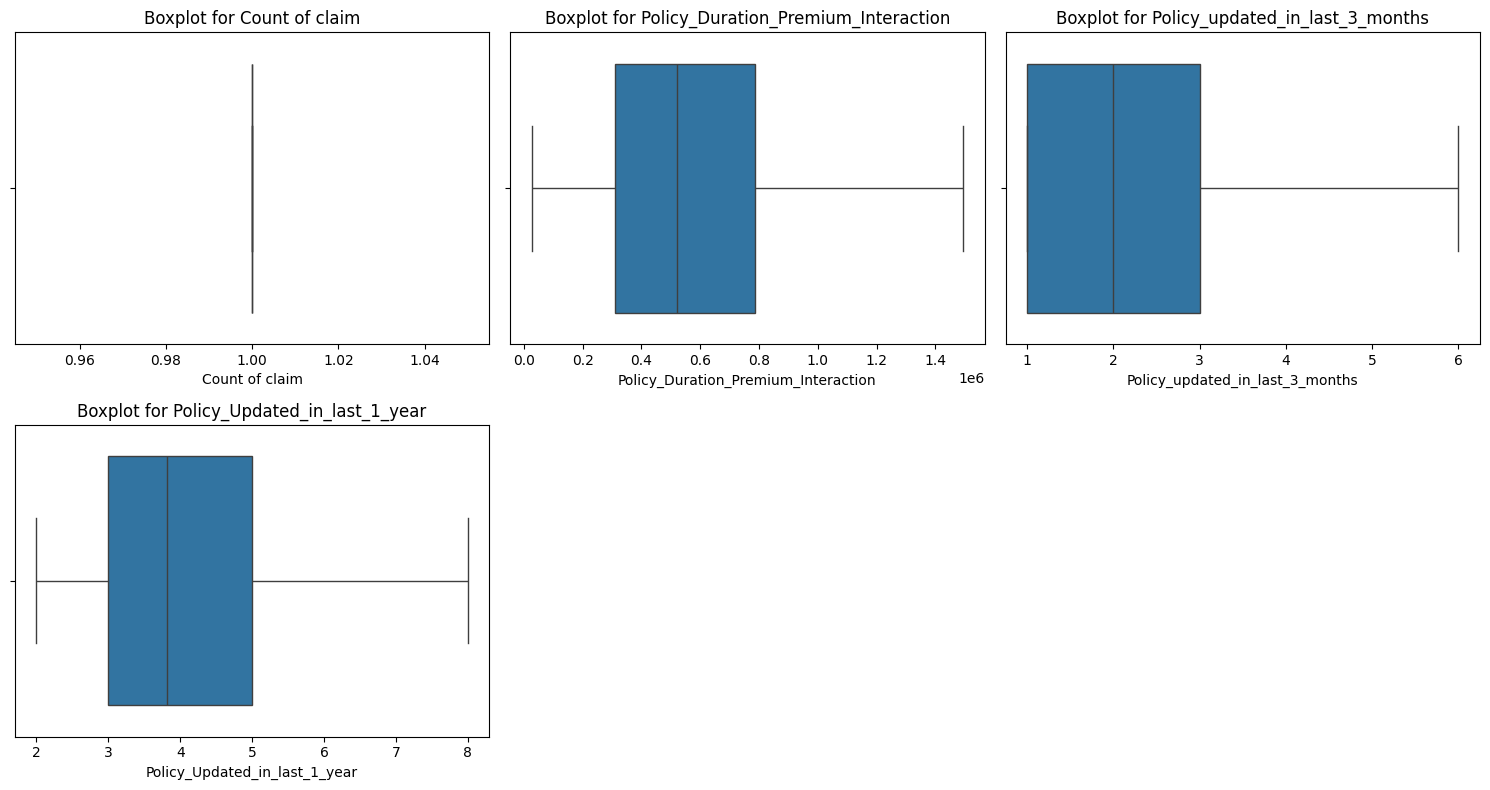

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

# Assuming df is your DataFrame
columns_to_remove_outliers = ['Count of claim','Policy_Duration_Premium_Interaction', 'Policy_updated_in_last_3_months', 'Policy_Updated_in_last_1_year']

# Sort the DataFrame in ascending order based on the specified columns
df_sorted = df.sort_values(columns_to_remove_outliers)

# Remove outliers and replace with the mean
for column in columns_to_remove_outliers:
    Q1 = df_sorted[column].quantile(0.25)
    Q3 = df_sorted[column].quantile(0.70)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with NaN
    df_sorted[column] = np.where((df_sorted[column] < lower_bound) | (df_sorted[column] > upper_bound), np.nan, df_sorted[column])

    # Replace NaN values with the mean of the column
    df_sorted[column].fillna(df_sorted[column].mean(), inplace=True)

# Display boxplots after outlier removal
plt.figure(figsize=(15, 8))
for i, column in enumerate(columns_to_remove_outliers, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_sorted[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()


#### Applied LabelEncoder

In [11]:
from sklearn.preprocessing import LabelEncoder

def label_encode_columns(data, columns_to_encode):
    label_encoder = LabelEncoder()
    for column in columns_to_encode:
        data[column] = label_encoder.fit_transform(data[column])
    return data


columns_to_encode = ["Short_Policy_Duration_Gretter_Than_5_Years","Cause_of_Death","Place_of_Death","Hospital_Stay","Tobacco_Use","Occupation","Policy_Loan_History","Surrender_History","Premium_Payment_Mode","Travel_History_Last_6_Months","High_Risk_Activities","Financial_Strain_Indicators","Criminal_History_India","Beneficiary_Financial_Dependence","Recent_Communication_Frequency","Autopsy_Report_Availability","Social_Media_Activity_Pre_Death","IP_Address_Geolocation_India","FIR_Filed","Product_Specialization","Client_Complaint_History","Agent_Insured_Relationship","Recent_Contact_with_Insured","Gender","Premium_Payment_History","Claim Status","Health Status","Pre-existing Conditions","Settlement Details","Disbursement Method","Beneficial_relationship"]

df_encoded = label_encode_columns(df, columns_to_encode)


# Drop the original columns that were one-hot encoded
df = df.drop(columns=columns_to_encode)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df = pd.concat([df, df_encoded], axis=1)
df = df.loc[:, ~df.columns.duplicated()]

#### Correlations

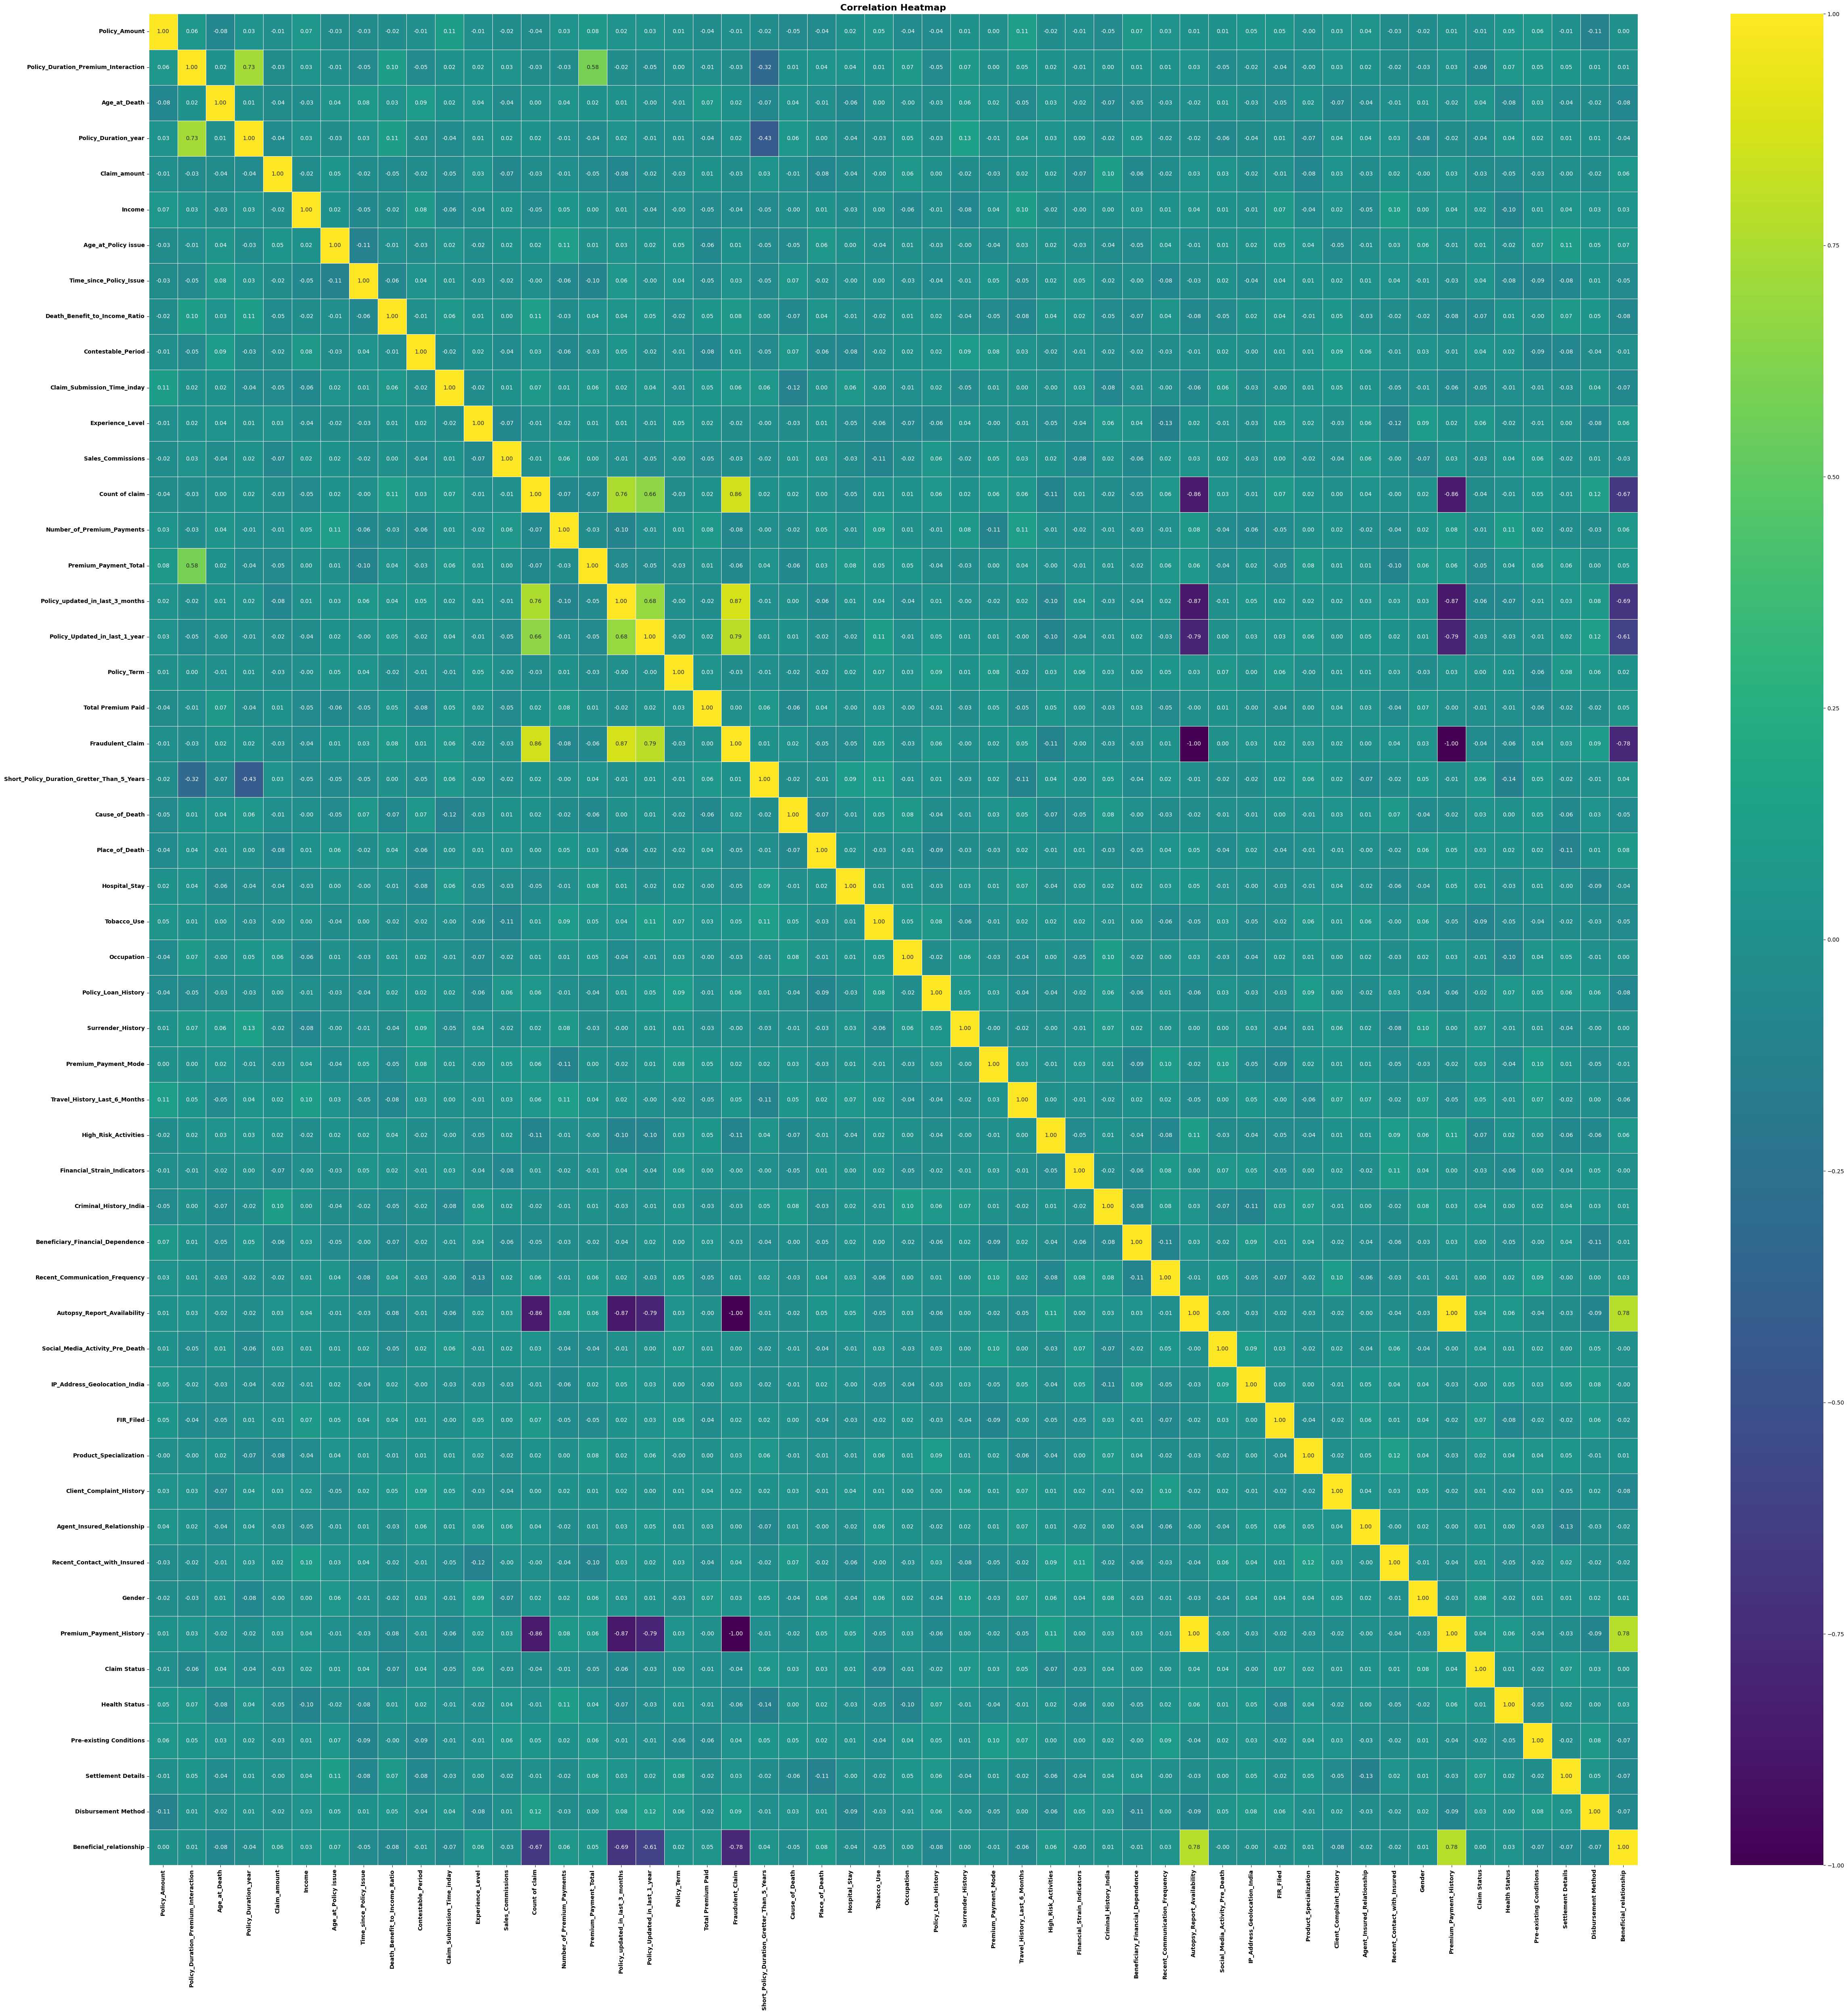

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df.corr()


plt.figure(figsize=(50, 50))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()


In [13]:
x = df.drop(["Fraudulent_Claim"],axis=1)

In [14]:
y = df['Fraudulent_Claim']
y.value_counts()

Fraudulent_Claim
0    390
1    110
Name: count, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Check Outliers After Scaler

Columns in X_train_scaled_df: RangeIndex(start=0, stop=51, step=1)


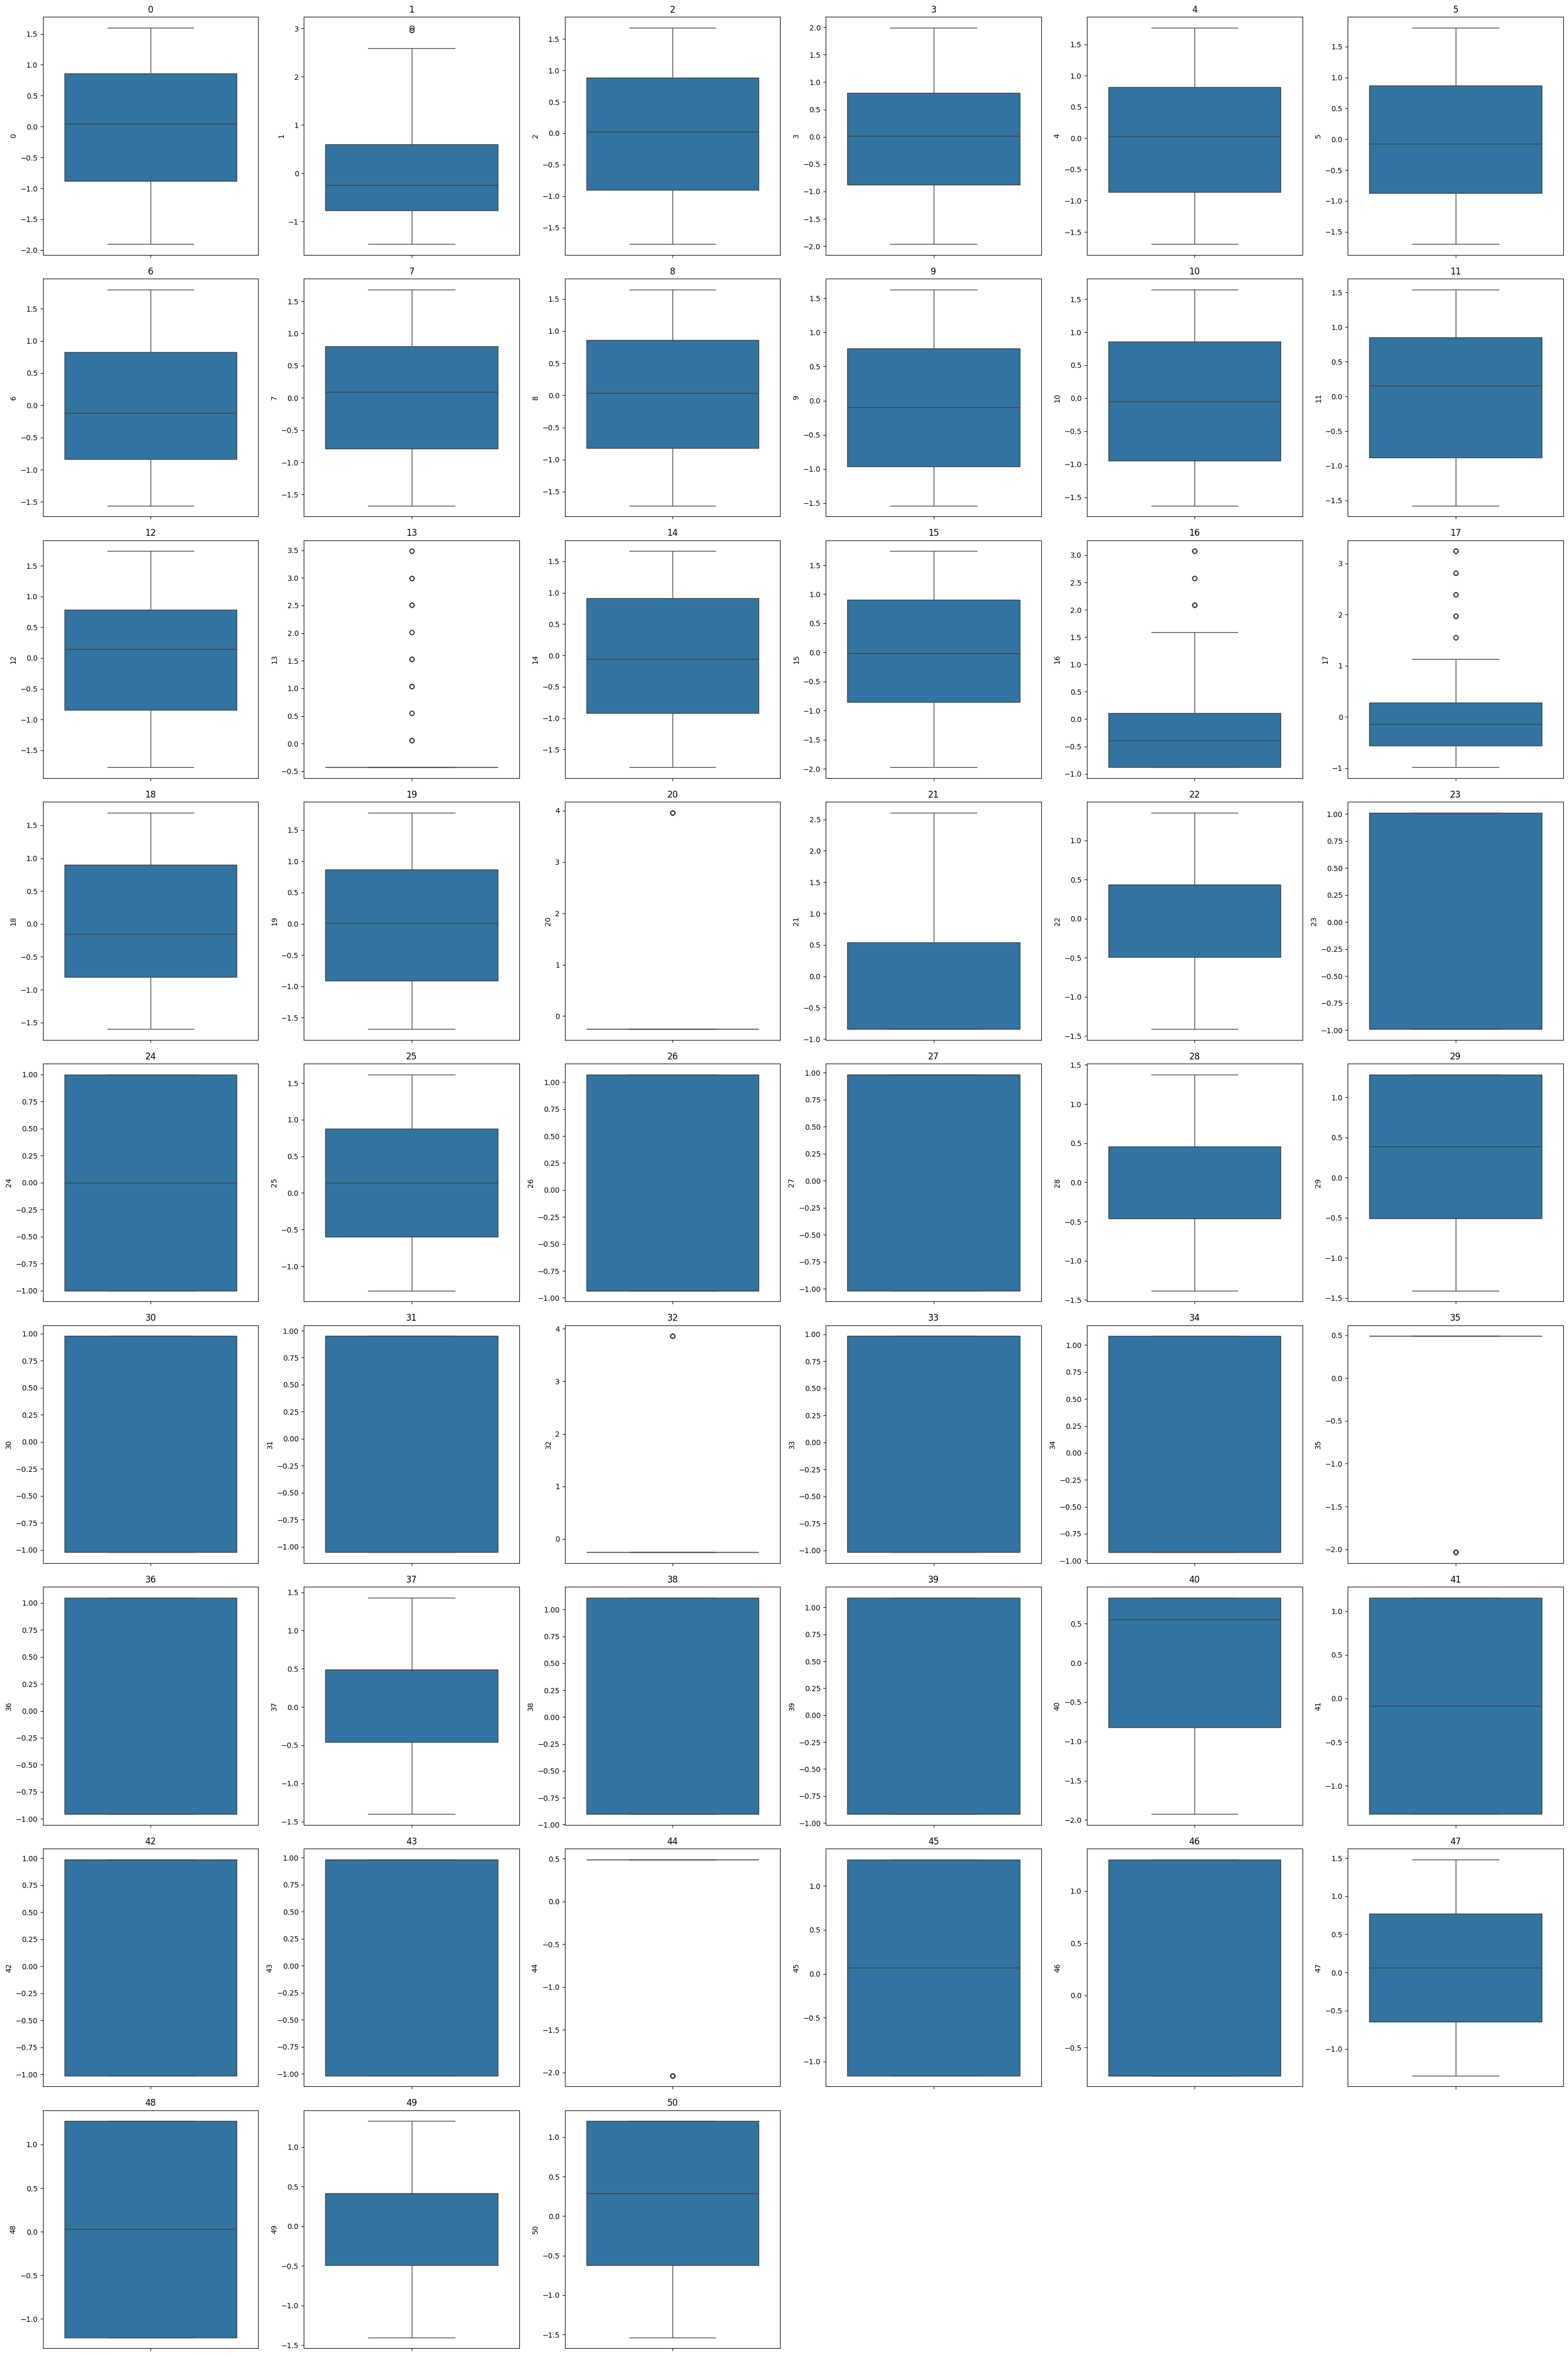

In [17]:
X_train_scaled_df = pd.DataFrame(X_train)

# Check the columns in X_train_scaled_df
print("Columns in X_train_scaled_df:", X_train_scaled_df.columns)

# Detect outliers for each column in the scaled dataset
outliers_per_column_scaled = X_train_scaled_df.apply(find_outliers)

# Create boxplots for scaled numeric columns with outliers
numeric_columns = X_train_scaled_df.select_dtypes(include=np.number).columns
num_numeric_columns = len(numeric_columns)

# Calculate the number of rows and columns for subplots
num_rows = (num_numeric_columns - 1) // 6 + 1
num_cols = min(num_numeric_columns, 6)

plt.figure(figsize=(30, 5 * num_rows))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=X_train_scaled_df[col])
    plt.title(col)
    plt.tight_layout()

# Show the plot
plt.show()


#### SMOTE Teq

In [18]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Oversampling using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)
# X_test_over, y_test_over = oversampler.fit_resample(X_test,y_test)
print("\nClass distribution after oversampling:")
print(y_train_over.value_counts())


Class distribution after oversampling:
Fraudulent_Claim
0    282
1    282
Name: count, dtype: int64


#### voting classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [20]:
# Instantiate individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
lr_classifier = LogisticRegression(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)

# Create a voting classifier
voting_classifier = VotingClassifier(
    estimators=[('rf', rf_classifier), ('gb', gb_classifier), ('lr', lr_classifier), ('svm', svm_classifier)],
    voting='soft'  # 'soft' for probability-based voting
)

# Train the ensemble model
voting_classifier.fit(X_train_over, y_train_over)

# Make predictions on the test set
y_pred_test = voting_classifier.predict(X_test)
y_pred_train = voting_classifier.predict(X_train_over)

In [21]:
print("Training Set Classification Report:\n", classification_report(y_train_over, y_pred_train))
print("Testing Set Classification Report:\n", classification_report(y_test, y_pred_test))


Training Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       1.00      1.00      1.00       282

    accuracy                           1.00       564
   macro avg       1.00      1.00      1.00       564
weighted avg       1.00      1.00      1.00       564

Testing Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        42

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



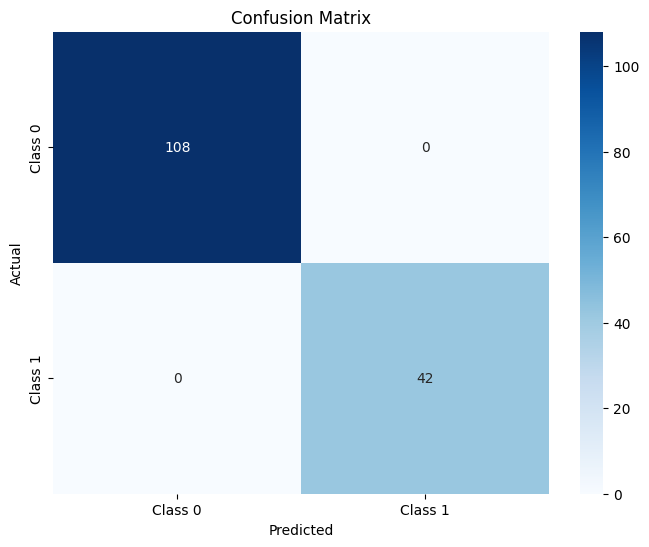

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred_test)



# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# TN FP
# FN TP